<a href="https://colab.research.google.com/github/Mithula05/Predictive-Maintenance-/blob/main/Predictive_Maintenance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

In [ ]:

# --- 2️⃣ Generate Dummy Dataset ---
np.random.seed(42)
num_samples = 2000

temperature = np.random.normal(75, 7, num_samples)    # °C
vibration = np.random.normal(0.5, 0.15, num_samples)  # mm/s
pressure = np.random.normal(30, 4, num_samples)       # PSI

failure = ((temperature > 85) | (vibration > 0.7) | (pressure > 36)).astype(int)

df = pd.DataFrame({
    'temperature': temperature,
    'vibration': vibration,
    'pressure': pressure,
    'failure': failure
})

print("Dataset sample:")
display(df.head())

Dataset sample:


,temperature,vibration,pressure,failure
0,78.476999,0.398723,26.546026,0
1,74.032150,0.478322,29.875186,0
2,79.533820,0.381137,30.072067,0
3,85.661209,0.453806,31.890521,1
4,73.360926,0.215958,24.532567,0


In [ ]:
# --- 3️⃣ Train Machine Learning Model ---
X = df[['temperature', 'vibration', 'pressure']]
y = df['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00        91

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



Reading 30
Temperature: 64.17 °C
Vibration: 0.54 mm/s
Pressure: 29.84 PSI
Status: ✅ Normal | Failure Probability: 0.00


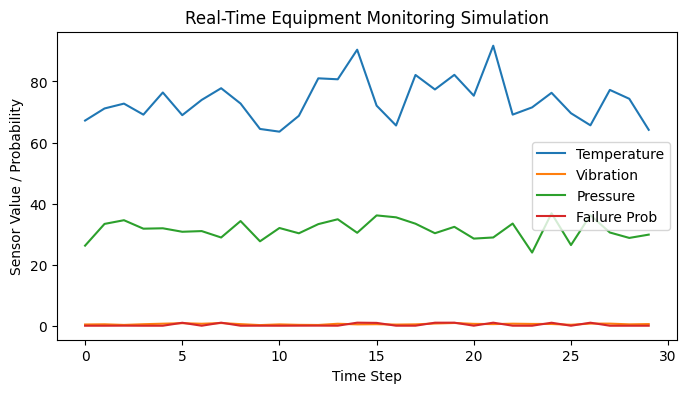

In [ ]:
# --- 4️⃣ Real-Time Monitoring Simulation ---
print("\nStarting Real-Time Monitoring Simulation...\n")
temps, vibs, presss, probs = [], [], [], []

plt.ion()  # interactive mode on
fig, ax = plt.subplots(1,1, figsize=(8,4))

for i in range(30):  # simulate 30 readings
    temp = np.random.normal(75, 7)
    vib = np.random.normal(0.5, 0.15)
    pres = np.random.normal(30, 4)

    reading = pd.DataFrame([[temp, vib, pres]], columns=['temperature','vibration','pressure'])
    pred = model.predict(reading)[0]
    prob = model.predict_proba(reading)[0][1]

    status = "⚠️ FAILURE" if pred==1 else "✅ Normal"

    # Append for plotting
    temps.append(temp)
    vibs.append(vib)
    presss.append(pres)
    probs.append(prob)

    # Clear output for dynamic effect
    clear_output(wait=True)

    # Display current reading
    print(f"Reading {i+1}")
    print(f"Temperature: {temp:.2f} °C")
    print(f"Vibration: {vib:.2f} mm/s")
    print(f"Pressure: {pres:.2f} PSI")
    print(f"Status: {status} | Failure Probability: {prob:.2f}")

    # Update plot
    ax.clear()
    ax.plot(temps, label='Temperature')
    ax.plot(vibs, label='Vibration')
    ax.plot(presss, label='Pressure')
    ax.plot(probs, label='Failure Prob')
    ax.legend()
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Sensor Value / Probability")
    ax.set_title("Real-Time Equipment Monitoring Simulation")

    display(fig)
    plt.pause(0.5)  # pause for simulation

In [ ]:
# --- Gradio UI (Updated Syntax) ---
import gradio as gr
import pandas as pd

# Prediction function
def predict_failure(temp, vib, pres):
    input_data = pd.DataFrame([[temp, vib, pres]], columns=['temperature','vibration','pressure'])
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]
    status = "⚠️ FAILURE" if pred==1 else "✅ Normal"
    return f"{status} | Failure Probability: {prob:.2f}"

# Define Gradio interface
interface = gr.Interface(
    fn=predict_failure,
    inputs=[
        gr.Slider(minimum=50, maximum=100, step=0.1, label="Temperature (°C)"),
        gr.Slider(minimum=0.1, maximum=1.0, step=0.01, label="Vibration (mm/s)"),
        gr.Slider(minimum=15, maximum=45, step=0.1, label="Pressure (PSI)")
    ],
    outputs=gr.Textbox(label="Equipment Status"),
    title="Predictive Maintenance Dashboard",
    description="Adjust sensor readings and predict equipment failure in real-time!"
)

# Launch Gradio in Colab
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc32a8c2a0f7ddf31f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
